# **Numerical Problem** [Implementation]

In [13]:
import numpy as np
import matplotlib.pyplot as plt


def f1(x, gamma=10):
    """ Quadaratic function in R^2 defined in Section 9.3.2 [BV]
    """
    return (0.5)*(x[0]**2 + gamma * x[1]**2)


def grad_f1(x, gamma=10):
    """ Gradient of quadratice function in R^2 defined in Section 9.3.2 [BV]
    """
    return np.array((x[0], gamma*x[1]))


def line_search_f1(x, gamma=10):
    """Exact line search of quadratice function in R^2 defined in Section 9.3.2 [BV]
    """
    s = (2 * x[0]**2 + 2 * gamma**2 * x[1]**2 ) / (2 * x[0]**2 + 2 * gamma**3 * x[1]**2)
    return s if s>=0 else None


def backtracking_f1(x, alpha=0.3, beta=0.8, gamma=10):
    """In-Exact line search of quadratice function in R^2 defined in Section 9.3.2 [BV]
    """
    t = 1
    delta_x = -grad_f1(x, gamma)
    while f1(x + t * (delta_x), gamma) > f1(x, gamma) + alpha * t * np.matmul(grad_f1(x).T, delta_x):
        t = beta * t
    return t
    

def f2(x):
    """ Non-quadratic function given in Eq. (9.20) of [BV]
    """
    return np.exp(x[0]+3*x[1]-0.1) + np.exp(x[0]-3*x[1]-0.1) + np.exp(-x[0]-0.1)


def grad_f2(x):
    """ Gradient of non-quadratic function given in Eq. (9.20) of [BV]
    """
    partial_derivative_x1 = np.exp(x[0]+3*x[1]-0.1) + np.exp(x[0]-3*x[1]-0.1) - np.exp(-x[0]-0.1)
    partial_derivative_x2 = 3*np.exp(x[0]+3*x[1]-0.1) - 3 * np.exp(x[0]-3*x[1]-0.1)
    return np.array((partial_derivative_x1, partial_derivative_x2))


def line_search_f2(x):
    """Exact line search of non-quadratic function given in Eq. (9.20) of [BV]
    """
    t = 1.0
    delta_x = -grad_f2(x)
    for s in np.arange(0.01, 10, 0.01):
        if f2(x + s * delta_x) < f2(x + t * delta_x):
            t = s 
    return t


def backtracking_f2(x, alpha=0.3, beta=0.8, gamma=10):
    """In-Exact line search of non-quadratic function given in Eq. (9.20) of [BV]
    """
    t = 1
    delta_x = -grad_f2(x)
    while f2(x + t * (delta_x)) > f2(x) + alpha * t * np.matmul(grad_f2(x).T, delta_x):
        t = beta * t
    return t

In [14]:
## Initializations

x1_star = np.array((0, 0))
f1_star = f1(x1_star)

x2_star = np.array((-0.5*np.log(2), 0))
f2_star = f2(x2_star)

print(f'f1_star: {f1_star}')
print(f'f2_star: {f2_star}')

x1_line = np.array([[10],[1]])
x1_back = x1_line.copy()

x2_line = np.array([[-2], [1]])
x2_back = x2_line.copy()

step1_line = 1E-1
step2_line = 1E-1

total_steps = 300

f1_star: 0.0
f2_star: 2.5592666966582156


In [15]:
x1_hist_line = []
x1_hist_line.append(x1_line)
f1_hist_line = []
f1_hist_line.append(f1(x1_line))

while np.log10(f1_hist_line[-1]-f1_star) > -10:
    step1_line =  line_search_f1(x1_line) or step1_line
    x1_line = x1_line + step1_line * (-grad_f1(x1_line))
    f1_hist_line.append(f1(x1_line))
    x1_hist_line.append(x1_line)

In [16]:
x1_hist_back = []
x1_hist_back.append(x1_back)
f1_hist_back = []
f1_hist_back.append(f1(x1_back))

alpha = 0.1
beta = 0.7

while np.log10(f1_hist_back[-1]-f1_star) > -10:
    step1_back =  backtracking_f1(x1_back, alpha, beta)
    x1_back = x1_back + step1_back * (-grad_f1(x1_back))
    f1_hist_back.append(f1(x1_back))
    x1_hist_back.append(x1_back)

f1_line  final value: [7.72571693e-11]
f1_back  final value: [8.53436274e-11]


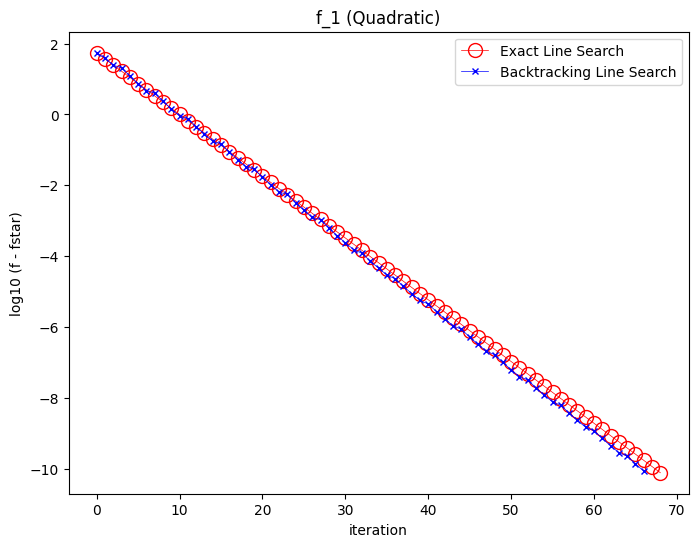

In [17]:
print(f'f1_line  final value: {f1_hist_line[-1]}')
print(f'f1_back  final value: {f1_hist_back[-1]}')

plt.figure(figsize=(8, 6))
plt.plot(np.log10(f1_hist_line-f1_star), '-o', label='Exact Line Search', markerfacecolor='none', ms=10, c='r', linewidth=0.5)
plt.plot(np.log10(f1_hist_back-f1_star), '-x', label='Backtracking Line Search', markerfacecolor='none', ms=5, c='b', linewidth=0.5)
plt.xlabel('iteration')
plt.ylabel('log10 (f - fstar)')
plt.title('f_1 (Quadratic)')
plt.legend()
plt.savefig('f1_rate.png')
plt.show()

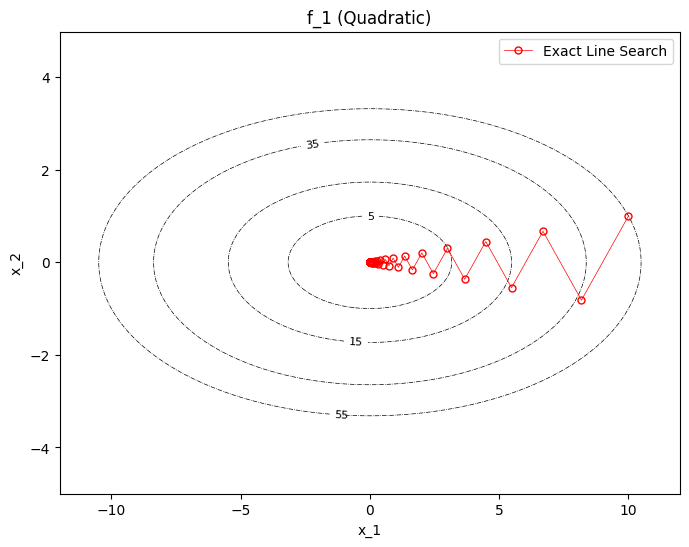

In [18]:
x1 = np.arange(-12.0, 12.0, 0.02)
x2 = np.arange(-5.0, 5.0, 0.02)
x1_grid, x2_grid = np.meshgrid(x1, x2)
x = np.dstack((x1_grid, x2_grid)).transpose(2, 0, 1)
y= f1(x)

fig, ax = plt.subplots(figsize=(8, 6))
cs = ax.contour(x1_grid, x2_grid, y, levels=[5, 15, 35, 55], colors='k', linestyles='-.', linewidths=0.5)
ax.clabel(cs, inline=True, fontsize=8)
ax.plot(np.array(x1_hist_line)[:, 0], np.array(x1_hist_line)[:, 1], '-o', markerfacecolor='none', ms=5, c='r', linewidth=0.5, label='Exact Line Search')
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
plt.title('f_1 (Quadratic)')
plt.legend()
plt.savefig('f1_contour_exact.png')
plt.show()

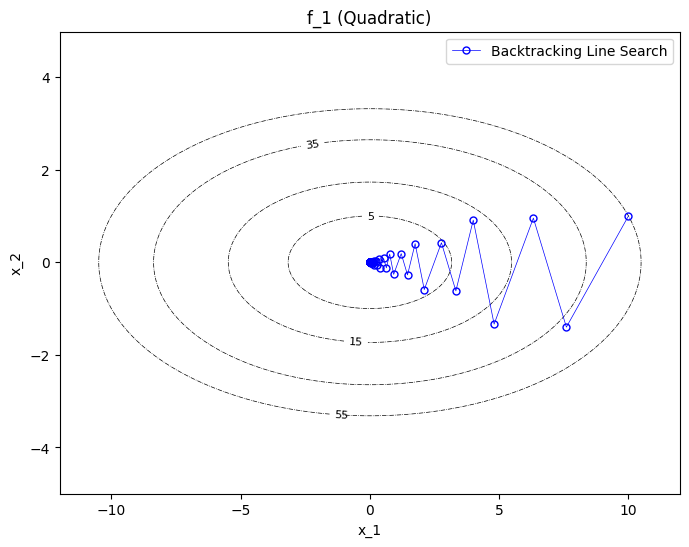

In [19]:
x1 = np.arange(-12.0, 12.0, 0.02)
x2 = np.arange(-5.0, 5.0, 0.02)
x1_grid, x2_grid = np.meshgrid(x1, x2)
x = np.dstack((x1_grid, x2_grid)).transpose(2, 0, 1)
y= f1(x)

fig, ax = plt.subplots(figsize=(8, 6))
cs = ax.contour(x1_grid, x2_grid, y, levels=[5, 15, 35, 55], colors='k', linestyles='-.', linewidths=0.5)
ax.clabel(cs, inline=True, fontsize=8)
ax.plot(np.array(x1_hist_back)[:, 0], np.array(x1_hist_back)[:, 1], '-o', markerfacecolor='none', ms=5, c='b', linewidth=0.5, label='Backtracking Line Search')
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
plt.title('f_1 (Quadratic)')
plt.legend()
plt.savefig('f1_contour_back.png')
plt.show()

In [20]:
x2_hist_line = []
x2_hist_line.append(x2_line)
f2_hist_line = []
f2_hist_line.append(f2(x2_line))

while np.log10(f2_hist_line[-1]-f2_star) > -10:
    step2_line =  line_search_f2(x2_line) or step2_line
    x2_line = x2_line + step2_line * (-grad_f2(x2_line))
    f2_hist_line.append(f2(x2_line))
    x2_hist_line.append(x2_line)

In [21]:
x2_hist_back = []
x2_hist_back.append(x2_back)
f2_hist_back = []
f2_hist_back.append(f2(x2_back))

alpha = 0.1
beta = 0.7

while np.log10(f2_hist_back[-1]-f2_star) > -10:
    step2_back =  backtracking_f2(x2_back, alpha, beta)
    x2_back = x2_back + step2_back * (-grad_f2(x2_back))
    f2_hist_back.append(f2(x2_back))
    x2_hist_back.append(x2_back)

f2_line  final value: [2.5592667]
f2_back  final value: [2.5592667]


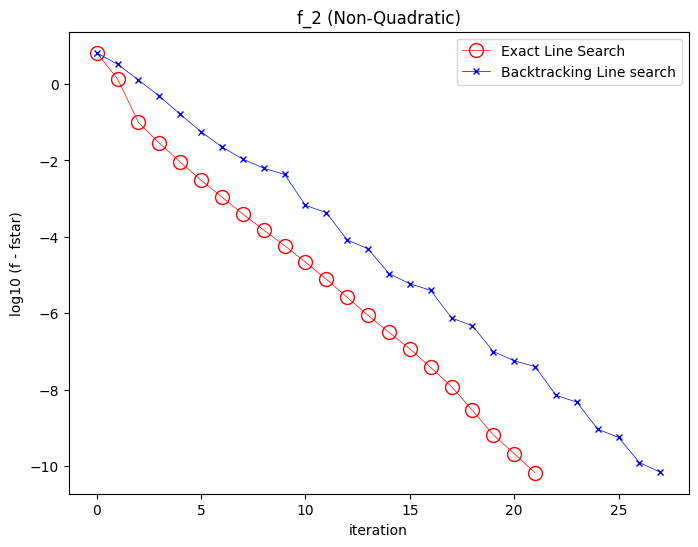

In [22]:
print(f'f2_line  final value: {f2_hist_line[-1]}')
print(f'f2_back  final value: {f2_hist_back[-1]}')

plt.figure(figsize=(8, 6))
plt.plot(np.log10(f2_hist_line-f2_star), '-o', label='Exact Line Search', markerfacecolor='none', ms=10, c='r', linewidth=0.5)
plt.plot(np.log10(f2_hist_back-f2_star), '-x', label='Backtracking Line search', markerfacecolor='none', ms=5, c='b', linewidth=0.5)
plt.xlabel('iteration')
plt.ylabel('log10 (f - fstar)')
plt.legend()
plt.title('f_2 (Non-Quadratic)')
plt.savefig('f2_rate.png')
plt.show()

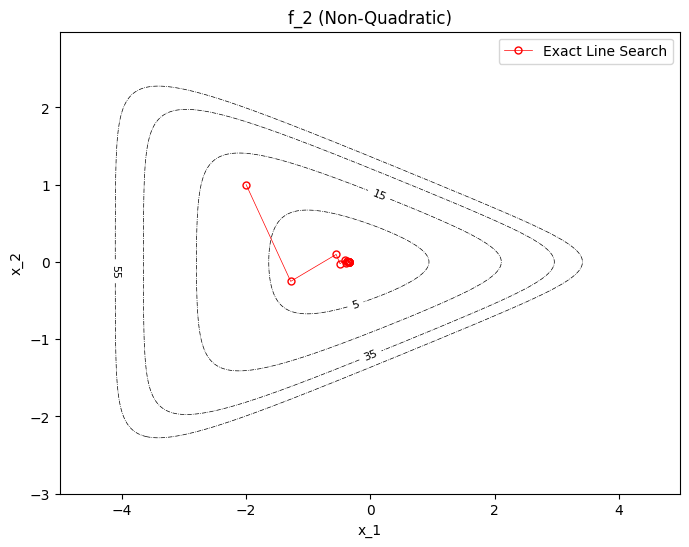

In [23]:
x1 = np.arange(-5.0, 5.0, 0.02)
x2 = np.arange(-3.0, 3.0, 0.02)
x1_grid, x2_grid = np.meshgrid(x1, x2)
x = np.dstack((x1_grid, x2_grid)).transpose(2, 0, 1)
y= f2(x)

fig, ax = plt.subplots(figsize=(8, 6))
cs = ax.contour(x1_grid, x2_grid, y, levels=[5, 15, 35, 55], colors='k', linestyles='-.', linewidths=0.5)
ax.clabel(cs, inline=True, fontsize=8)
ax.plot(np.array(x2_hist_line)[:, 0], np.array(x2_hist_line)[:, 1], '-o', markerfacecolor='none', ms=5, c='r', linewidth=0.5, label='Exact Line Search')
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
plt.legend()
plt.title('f_2 (Non-Quadratic)')
plt.savefig('f2_contour_exact.png')
plt.show()

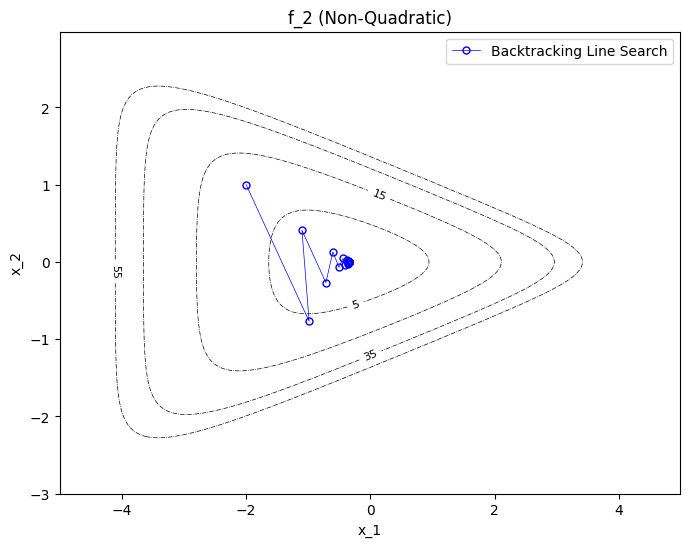

In [24]:
x1 = np.arange(-5.0, 5.0, 0.02)
x2 = np.arange(-3.0, 3.0, 0.02)
x1_grid, x2_grid = np.meshgrid(x1, x2)
x = np.dstack((x1_grid, x2_grid)).transpose(2, 0, 1)
y= f2(x)

fig, ax = plt.subplots(figsize=(8, 6))
cs = ax.contour(x1_grid, x2_grid, y, levels=[5, 15, 35, 55], colors='k', linestyles='-.', linewidths=0.5)
ax.clabel(cs, inline=True, fontsize=8)
ax.plot(np.array(x2_hist_back)[:, 0], np.array(x2_hist_back)[:, 1], '-o', markerfacecolor='none', ms=5, c='b', linewidth=0.5, label='Backtracking Line Search')
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
plt.legend()
plt.title('f_2 (Non-Quadratic)')
plt.savefig('f2_contour_back.png')
plt.show()